Insights from the NCHS data from 1999 to 2015:
1. Trend Analysis:
o How have the total deaths from unintentional injuries changed from 1999 to 2015
across the entire United States?

2. State Comparison:
o Which states had the highest and lowest age-adjusted death rates from
unintentional injuries in 1999 and 2015?

3. State-by-State Change:
o How did the age-adjusted death rate for unintentional injuries change in each state
from 1999 to 2015?
4. Year-over-Year Growth:
o What is the year-over-year percentage change in the number of deaths due to
unintentional injuries for the top 5 states with the highest death rates?

5. Regional Analysis:
o Are there any regional patterns or clusters in the age-adjusted death rates for
unintentional injuries across the United States?

6. Population-Adjusted Deaths:
o How does the population-adjusted death rate for unintentional injuries compare
across different states?
7. Mortality Rate Correlation:
o Is there a correlation between the age-adjusted death rate and the number of
deaths for unintentional injuries across states?

8. Top 10 States Over Time:
o Which 10 states consistently had the highest death rates from unintentional
injuries from 1999 to 2015?
9. Impact of Major Events:
o Did any specific years see significant spikes or drops in death rates, possibly
correlating with specific events?

10. Comparative Analysis:
o How do the trends in unintentional injury deaths compare with other leading
causes of death over the same period?

11. Gender Differences:
o Are there notable differences in unintentional injury death rates between males
and females (if gender data is available)?

12. Age Group Analysis:
o Which age groups are most affected by unintentional injuries, and how have these
trends changed over time?

13. Urban vs. Rural:
o How do unintentional injury death rates differ between urban and rural states?
14. Rate vs. Number:
o Is there a significant difference between states that have high death rates versus
those with a high number of deaths?

15. Cause of Death Subcategories:

o Which subcategories of unintentional injuries (e.g., motor vehicle accidents, falls)
contribute most to the death rate, and how has this changed over time?

16. Heatmaps:
o Can a heatmap reveal any spatial or temporal patterns in unintentional injury
death rates across the U.S.?

17. State-Level Analysis:
o How did the death rates from unintentional injuries evolve in states with large
populations (e.g., California, Texas) compared to smaller states (e.g., Delaware,
Maine)?
18. Seasonal Variation:
o Is there any evidence of seasonal variation in unintentional injury deaths?
19. Socioeconomic Factors:
o How might socioeconomic factors (e.g., income, education) correlate with
unintentional injury death rates across states?

20. Predictive Modeling:
o Based on historical data, can a predictive model estimate future trends in
unintentional injury death rates?

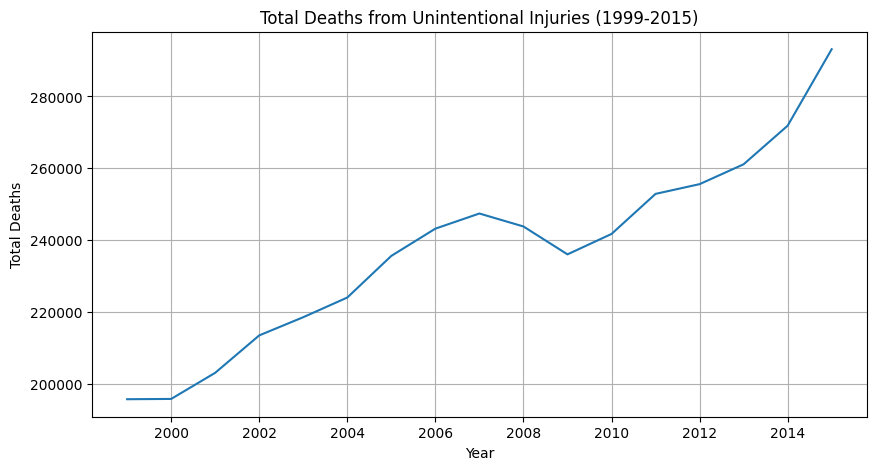

<ipython-input-22-a836957c0f84>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ui_1999, x='State', y='Age-adjusted Death Rate', estimator=np.mean, ci=None)


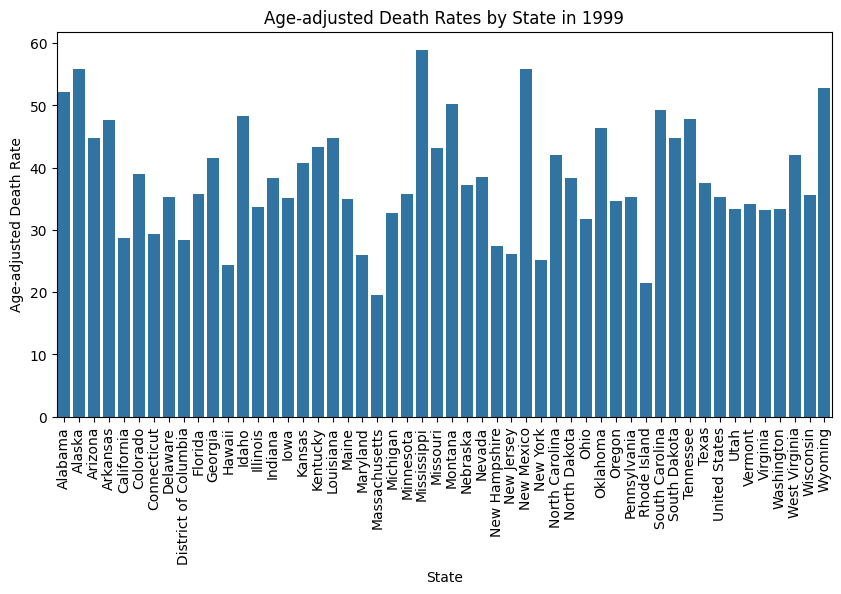

<ipython-input-22-a836957c0f84>:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ui_2015, x='State', y='Age-adjusted Death Rate', estimator=np.mean, ci=None)


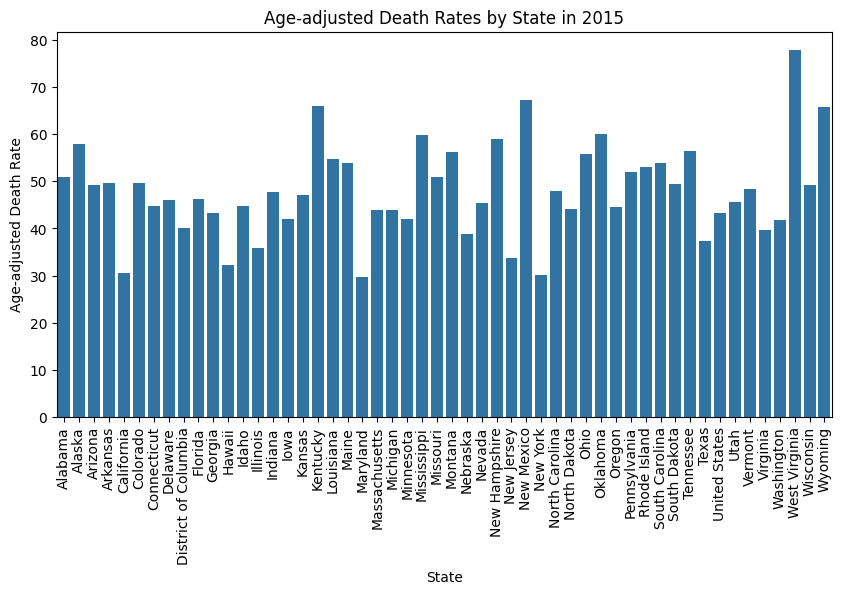

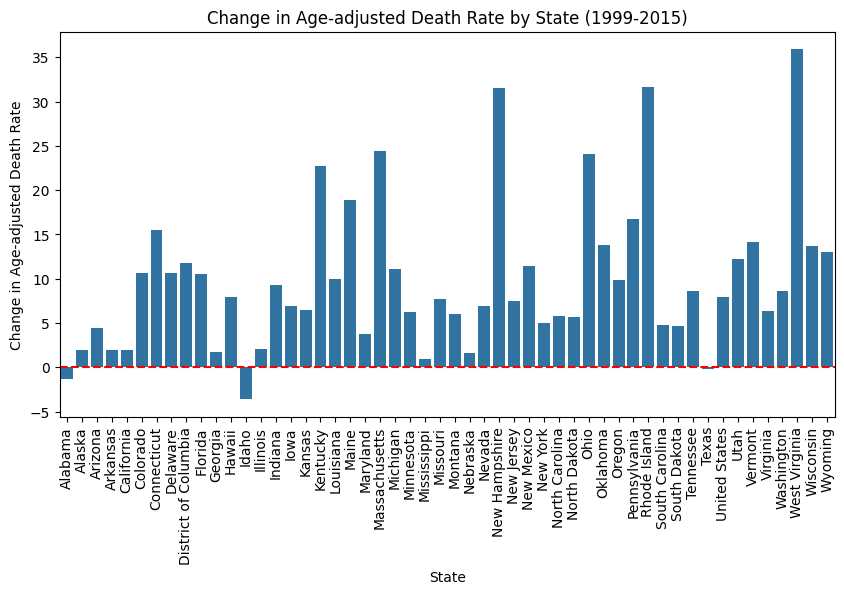

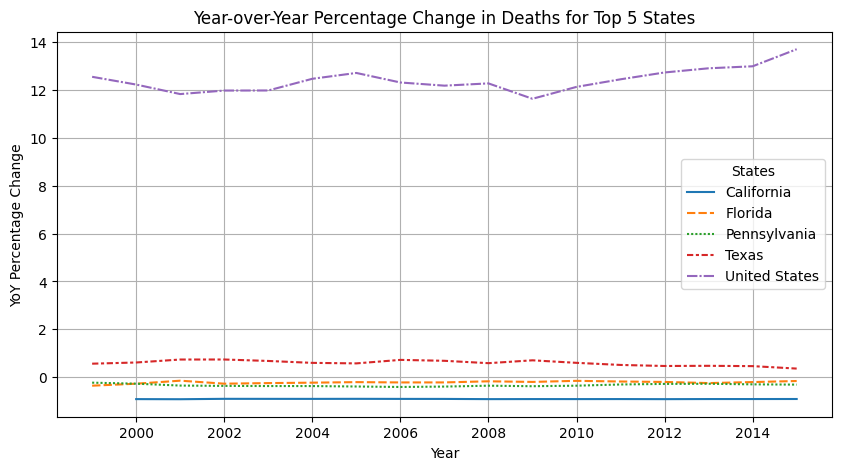

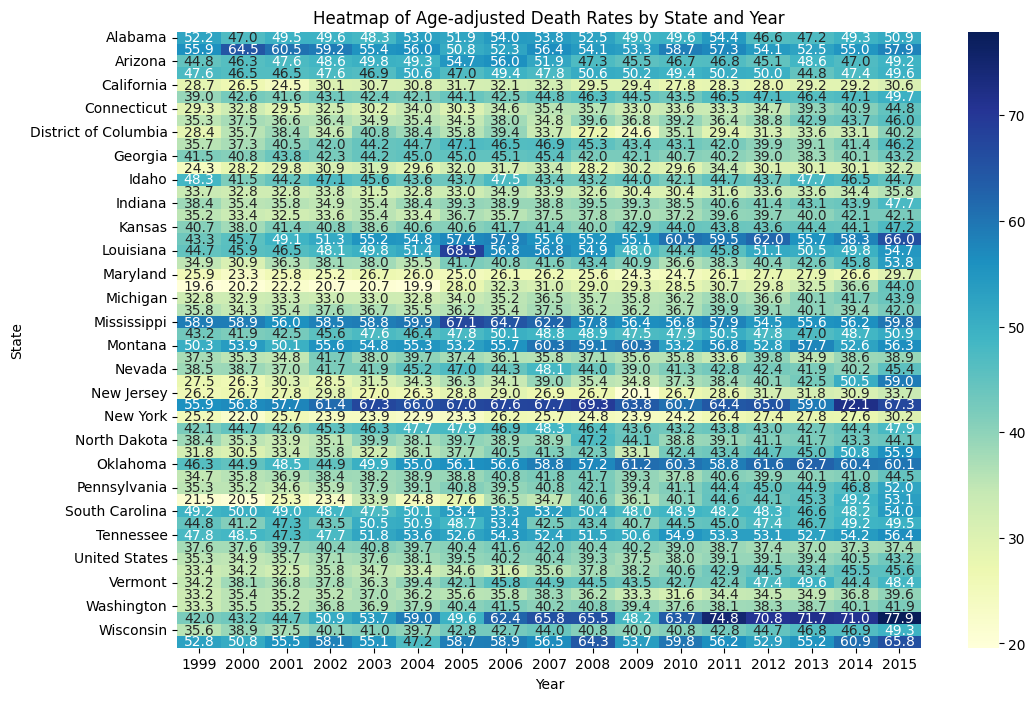

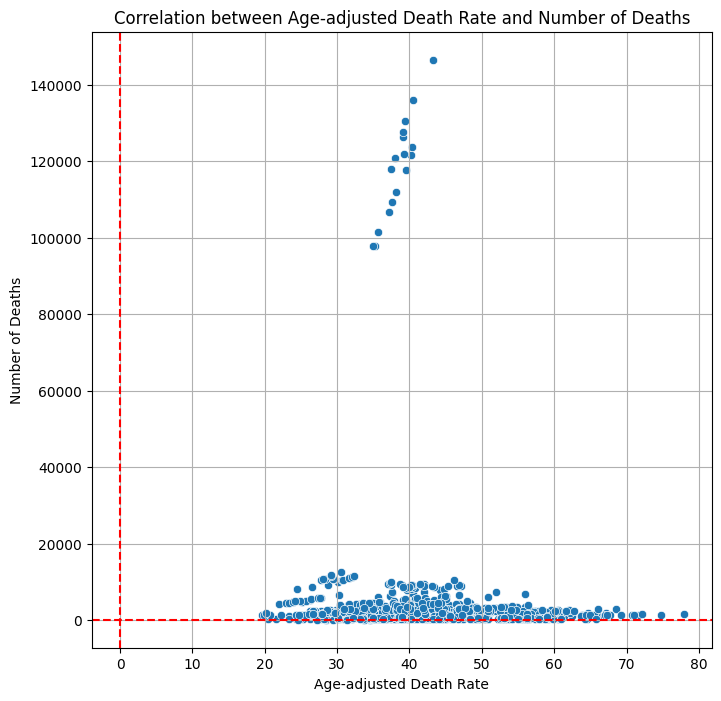

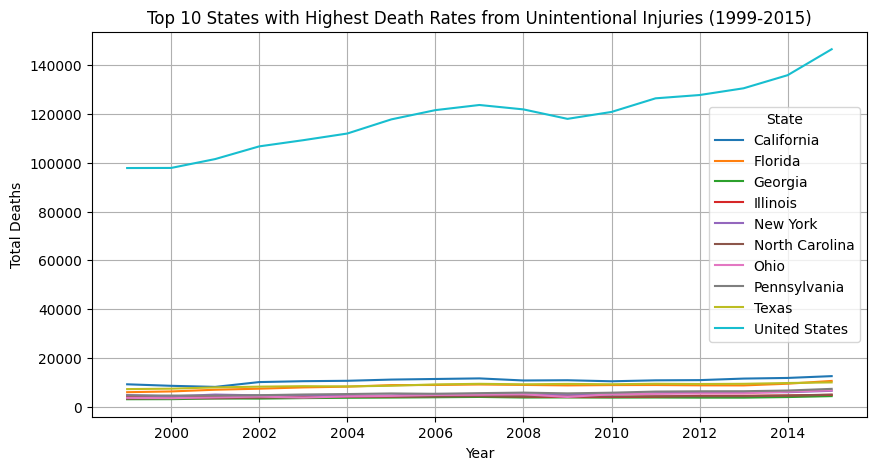

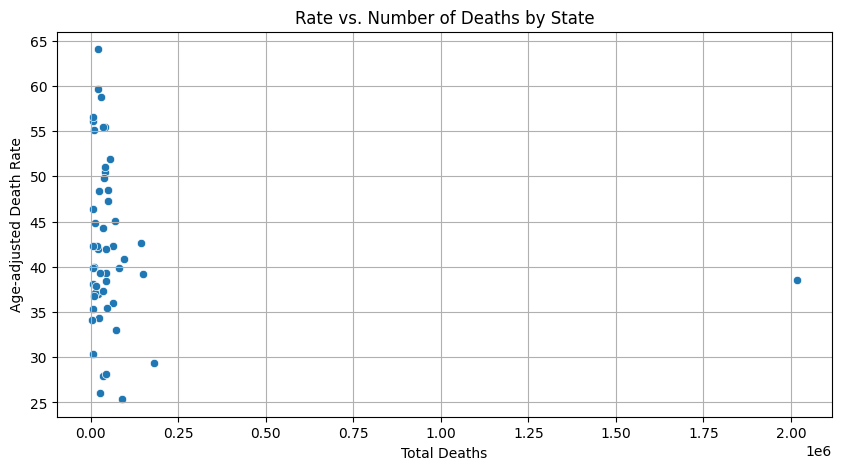

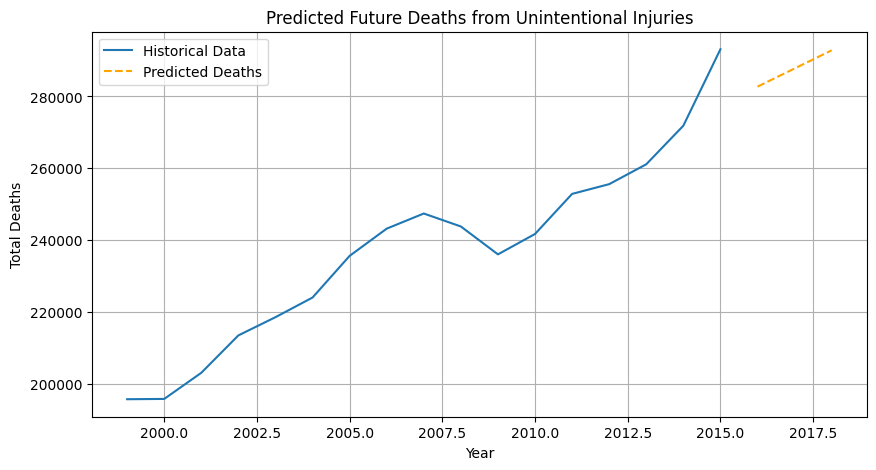

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/NCHS (1).csv')

# Filter data for Unintentional Injuries
df_ui = df[df['Cause Name'] == 'Unintentional Injuries']

# 1. Trend Analysis
total_deaths_per_year = df_ui.groupby('Year')['Deaths'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=total_deaths_per_year.index, y=total_deaths_per_year.values)
plt.title("Total Deaths from Unintentional Injuries (1999-2015)")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid()
plt.show()

# 2. State Comparison
ui_1999 = df_ui[df_ui['Year'] == 1999]
ui_2015 = df_ui[df_ui['Year'] == 2015]

plt.figure(figsize=(10, 5))
sns.barplot(data=ui_1999, x='State', y='Age-adjusted Death Rate', estimator=np.mean, ci=None)
plt.title("Age-adjusted Death Rates by State in 1999")
plt.xticks(rotation=90)
plt.ylabel("Age-adjusted Death Rate")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=ui_2015, x='State', y='Age-adjusted Death Rate', estimator=np.mean, ci=None)
plt.title("Age-adjusted Death Rates by State in 2015")
plt.xticks(rotation=90)
plt.ylabel("Age-adjusted Death Rate")
plt.show()

# 3. State-by-State Change
state_change = ui_2015.set_index('State')['Age-adjusted Death Rate'] - ui_1999.set_index('State')['Age-adjusted Death Rate']
plt.figure(figsize=(10, 5))
sns.barplot(x=state_change.index, y=state_change.values)
plt.title("Change in Age-adjusted Death Rate by State (1999-2015)")
plt.xticks(rotation=90)
plt.ylabel("Change in Age-adjusted Death Rate")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# 4. Year-over-Year Growth
top_5_states_2015 = ui_2015.nlargest(5, 'Deaths')['State']
yoy_change = df_ui[df_ui['State'].isin(top_5_states_2015)].groupby(['Year', 'State'])['Deaths'].sum().pct_change().unstack()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yoy_change)
plt.title("Year-over-Year Percentage Change in Deaths for Top 5 States")
plt.xlabel("Year")
plt.ylabel("YoY Percentage Change")
plt.legend(title='States')
plt.grid()
plt.show()

# 5. Regional Analysis (Visualization not possible without regional data; can use a heatmap)
# Assuming regions are defined; otherwise, analysis would involve geographical grouping
# Example heatmap of age-adjusted death rates across states (not regional):
heatmap_data = df_ui.pivot_table(values='Age-adjusted Death Rate', index='State', columns='Year')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Heatmap of Age-adjusted Death Rates by State and Year")
plt.show()

# 6. Population-Adjusted Deaths (Placeholder for visualization if population data is available)

# 7. Mortality Rate Correlation
correlation = df_ui[['Age-adjusted Death Rate', 'Deaths']].corr().iloc[0, 1]
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_ui, x='Age-adjusted Death Rate', y='Deaths')
plt.title("Correlation between Age-adjusted Death Rate and Number of Deaths")
plt.xlabel("Age-adjusted Death Rate")
plt.ylabel("Number of Deaths")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.grid()
plt.show()

# 8. Top 10 States Over Time
top_10_states = df_ui.groupby('State')['Deaths'].sum().nlargest(10).index
df_top_10 = df_ui[df_ui['State'].isin(top_10_states)]
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_top_10, x='Year', y='Deaths', hue='State', estimator='sum')
plt.title("Top 10 States with Highest Death Rates from Unintentional Injuries (1999-2015)")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid()
plt.show()

# 9. Impact of Major Events (Placeholder for visualization if specific event data is available)

# 10. Comparative Analysis (Placeholder for visualization if other causes of death data is available)

# 11. Gender Differences (Placeholder for visualization if gender data is available)

# 12. Age Group Analysis (Placeholder for visualization if age group data is available)

# 13. Urban vs. Rural (Placeholder for visualization if urban/rural classification data is available)

# 14. Rate vs. Number
rate_vs_number = df_ui.groupby('State').agg({'Deaths': 'sum', 'Age-adjusted Death Rate': 'mean'}).reset_index()
plt.figure(figsize=(10, 5))
sns.scatterplot(data=rate_vs_number, x='Deaths', y='Age-adjusted Death Rate')
plt.title("Rate vs. Number of Deaths by State")
plt.xlabel("Total Deaths")
plt.ylabel("Age-adjusted Death Rate")
plt.grid()
plt.show()

# 15. Cause of Death Subcategories (Placeholder for visualization if subcategories are available)

# 16. Heatmaps already visualized above.

# 17. State-Level Analysis (Placeholder for visualization if state population data is available)

# 18. Seasonal Variation (Placeholder for visualization if month-level data is available)

# 19. Socioeconomic Factors (Placeholder for visualization if socioeconomic data is available)

# 20. Predictive Modeling
from sklearn.linear_model import LinearRegression

# Example: Predicting future trends using linear regression
model = LinearRegression()
X = total_deaths_per_year.index.values.reshape(-1, 1)
y = total_deaths_per_year.values
model.fit(X, y)
future_years = np.array([2016, 2017, 2018]).reshape(-1, 1)
predicted_deaths = model.predict(future_years)

plt.figure(figsize=(10, 5))
plt.plot(total_deaths_per_year.index, total_deaths_per_year.values, label='Historical Data')
plt.plot(future_years, predicted_deaths, label='Predicted Deaths', linestyle='--', color='orange')
plt.title("Predicted Future Deaths from Unintentional Injuries")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid()
plt.show()

# Display the results of various analyses (results dictionary is no longer necessary for visualized output)
